# Neural Network Visualization

**Authors: Yanina Arameleva, Jan Čuhel**

In [ ]:
%matplotlib inline

In [ ]:
!pip install -q umap-learn tqdm

     |████████████████████████████████| 88 kB 3.7 MB/s 
     |████████████████████████████████| 1.1 MB 30.5 MB/s 


# Based on tutorial: Building a simple neural-network with Keras

**From: Xavier Snelgrove**

This is a simple quick-start in performing digit recognition in a neural network in Keras, for a short tutorial at the University of Toronto. It is largely based on the `mnist_mlp.py` example from the Keras source.


## Time to build a neural network!
First let's import some prerequisites

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils

from tqdm import tqdm

## Load training data

In [ ]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print(type(X_train))
print(X_train[0])

11501568/11490434 [==============================] - 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)
<class 'numpy.ndarray'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0

In [ ]:
X_train[0].shape

(28, 28)

Saving the images

In [ ]:
!mkdir train_images
!mkdir test_images

In [ ]:
from PIL import Image

for i in tqdm(range(X_train.shape[0]), desc='Saving train images'):
  image = Image.fromarray(X_train[i])
  image.save(f'./train_images/{i}.png', format='PNG')

for i in tqdm(range(X_test.shape[0]), desc='Saving test images'):
  image = Image.fromarray(X_test[i])
  image.save(f'./test_images/{i}.png', format='PNG')

Saving test images: 100%|██████████| 10000/10000 [00:01<00:00, 5634.17it/s]


In [ ]:
!zip -r train_images.zip ./train_images/
!zip -r test_images.zip ./test_images/

Streaming output truncated to the last 5000 lines.
  adding: test_images/3668.png (deflated 2%)
  adding: test_images/9859.png (stored 0%)
  adding: test_images/4311.png (stored 0%)
  adding: test_images/8495.png (deflated 0%)
  adding: test_images/8818.png (stored 0%)
  adding: test_images/7702.png (stored 0%)
  adding: test_images/9997.png (stored 0%)
  adding: test_images/6664.png (stored 0%)
  adding: test_images/3712.png (stored 0%)
  adding: test_images/5763.png (deflated 1%)
  adding: test_images/2557.png (stored 0%)
  adding: test_images/9505.png (stored 0%)
  adding: test_images/345.png (stored 0%)
  adding: test_images/6317.png (stored 0%)
  adding: test_images/9820.png (stored 0%)
  adding: test_images/105.png (stored 0%)
  adding: test_images/6296.png (stored 0%)
  adding: test_images/5076.png (stored 0%)
  adding: test_images/2117.png (stored 0%)
  adding: test_images/2075.png (stored 0%)
  adding: test_images/7764.png (stored 0%)
  adding: test_images/1747.png (deflated 1

Let's look at some examples of the training data

In [ ]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.tight_layout()
    plt.title("Class {}".format(y_train[i]))

## Format the data for training
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Modify the target matrices to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [ ]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
print(Y_train.shape)
print(y_train.shape)
Y_train[0], y_train[0]

(60000, 10)
(60000,)


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32), 5)

# Build the neural network
Build the neural-network. Here we'll do a simple 3 layer fully connected network.
<img src="figure.png" />

In [ ]:
model = Sequential()
model.add(Dense(64, input_shape=(784,), name='Input_layer'))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(32, name='Hidden_layer'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10, name='Output_layer'))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 64)                50240     
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 Hidden_layer (Dense)        (None, 32)                2080      
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 Output_layer (Dense)        (None, 10)                3

Plotting the model

In [ ]:
tf.keras.utils.plot_model(model, to_file='model_mnist.jpg', show_shapes=False, show_layer_names=False, rankdir='LR')

## Compile the model
Keras is built on top of Theano (and now TensorFlow as well), both packages that allow you to define a *computation graph* in Python, which they then compile and run efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiing a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function we'll use here is called *categorical crossentropy*, and is a loss function well-suited to comparing two probability distributions.

Here our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. [More detail at Wikipedia](https://en.wikipedia.org/wiki/Cross_entropy)

The optimizer helps determine how quickly the model learns, how resistent it is to getting "stuck" or "blowing up". We won't discuss this in too much detail, but "adam" is often a good choice (developed here at U of T).

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train the model!
This is the fun part: you can feed the training data loaded in earlier into this model and it will learn to classify digits

In [ ]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20, verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 5s 4ms/step - loss: 0.6323 - accuracy: 0.8064 - val_loss: 0.2206 - val_accuracy: 0.9359
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2910 - accuracy: 0.9151 - val_loss: 0.1585 - val_accuracy: 0.9544
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2317 - accuracy: 0.9330 - val_loss: 0.1364 - val_accuracy: 0.9580
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2017 - accuracy: 0.9407 - val_loss: 0.1208 - val_accuracy: 0.9633
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1785 - accuracy: 0.9481 - val_loss: 0.1146 - val_accuracy: 0.9657
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1639 - accuracy: 0.9524 - val_loss: 0.1097 - val_accuracy: 0.9670
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1535 - accuracy: 0.9540 - val_loss: 0.1024 - val_accuracy: 0.9690
Epoch 

## Finally, evaluate its performance

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0960 - accuracy: 0.9732
Test score: 0.09602595120668411
Test accuracy: 0.9732000231742859


### Visualization of training

In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric.capitalize())
  plt.legend([metric.capitalize(), f'Validation {metric}'])

(0.0, 0.6594503242522478)

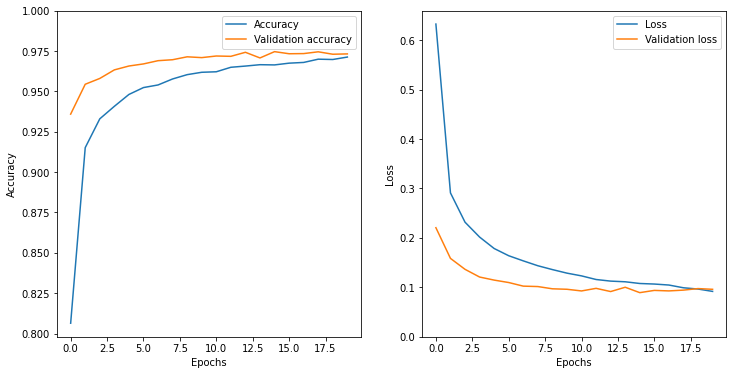

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

### Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = np.argmax(model.predict(X_test), axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

print(predicted_classes)

[7 2 1 ... 4 5 6]


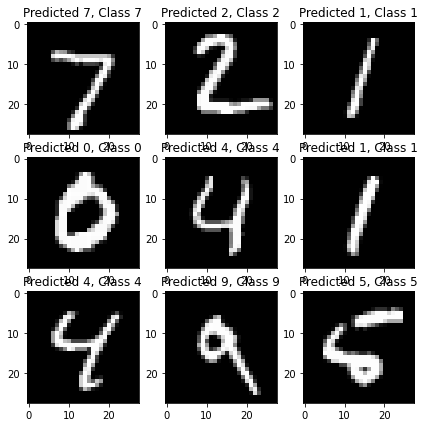

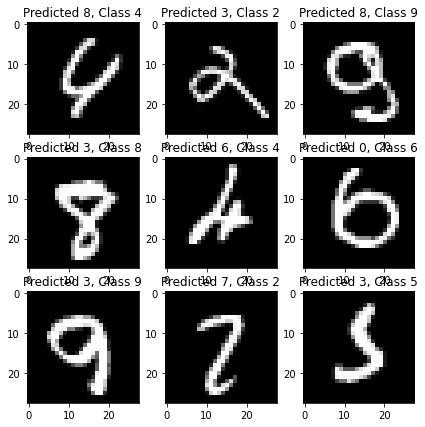

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

In [ ]:
model.save('mnist_model.h5')

### Saving the predictions

In [ ]:
X_test_predictions = model.predict(X_test)
X_train_predictions = model.predict(X_train)

print(X_test_predictions.shape, X_train_predictions.shape)

(10000, 10) (60000, 10)


In [ ]:
tf.nn.softmax(X_test_predictions[:2], axis=1)

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0.08533675, 0.08533675, 0.08533679, 0.08533678, 0.08533675,
        0.08533675, 0.08533675, 0.2319691 , 0.08533675, 0.08533677],
       [0.08533841, 0.08534132, 0.23194279, 0.08534692, 0.08533841,
        0.08533841, 0.08533841, 0.08533841, 0.08533841, 0.08533841]],
      dtype=float32)>

#### Dimension reduction

In [ ]:
from sklearn.manifold import TSNE
from umap import UMAP


def PCA(data, k=2):
  # Center the data points
  data -= data.mean(axis=0)
  # Compute the covariance matrix and normalize
  X_cov = np.cov(data.T)/data.shape[0]
  # Compute eigenvalues and eigenvectors
  eig_values, eig_vectors = np.linalg.eigh(X_cov)
  # Sort eigenvalues and their eigenvectors in descending order 
  sorted_idx = np.argsort(-eig_values)
  # eig_values = eig_values[sorted_idx]
  eig_vectors = eig_vectors[:, sorted_idx]
  # Apply dot product of the data
  return np.dot(data, eig_vectors[:, :k])


def reduce_dimension(data, dim=2, method='PCA', random_state=12):
  '''Function for reducing dimensionality.'''
  if method == 'PCA':
    return PCA(data, k=dim)
  elif method == 'TSNE':
    return TSNE(n_components=dim, random_state=random_state).fit_transform(data)
  elif method == 'UMAP':
    return UMAP(n_components=dim, random_state=random_state).fit_transform(data)

  # No dimension reduction
  return data


In [ ]:
X_test_predictions_tsne_2d = reduce_dimension(X_test_predictions, dim=2, method='TSNE')
X_test_predictions_umap_2d = reduce_dimension(X_test_predictions, dim=2, method='UMAP')
X_train_predictions_tsne_2d = reduce_dimension(X_train_predictions, dim=2, method='TSNE')
X_train_predictions_umap_2d = reduce_dimension(X_train_predictions, dim=2, method='UMAP')

print(X_test_predictions_tsne_2d.shape, X_test_predictions_umap_2d.shape, X_train_predictions_tsne_2d.shape, X_train_predictions_umap_2d.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(10000, 2) (10000, 2) (60000, 2) (60000, 2)


In [ ]:
X_test_predictions_pca_2d = reduce_dimension(X_test_predictions, dim=2, method='PCA')
X_train_predictions_pca_2d = reduce_dimension(X_train_predictions, dim=2, method='PCA')

print(X_test_predictions_pca_2d.shape, X_train_predictions_pca_2d.shape)

(10000, 2) (60000, 2)


In [ ]:
X_test_predictions_tsne_3d = reduce_dimension(X_test_predictions, dim=3, method='TSNE')
X_test_predictions_umap_3d = reduce_dimension(X_test_predictions, dim=3, method='UMAP')
X_train_predictions_tsne_3d = reduce_dimension(X_train_predictions, dim=3, method='TSNE')
X_train_predictions_umap_3d = reduce_dimension(X_train_predictions, dim=3, method='UMAP')

print(X_test_predictions_tsne_3d.shape, X_test_predictions_umap_3d.shape, X_train_predictions_tsne_3d.shape, X_train_predictions_umap_3d.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(10000, 3) (10000, 3) (60000, 3) (60000, 3)


In [ ]:
X_test_predictions_pca_3d = reduce_dimension(X_test_predictions, dim=3, method='PCA')
X_train_predictions_pca_3d = reduce_dimension(X_train_predictions, dim=3, method='PCA')

print(X_test_predictions_pca_3d.shape, X_train_predictions_pca_3d.shape)

(10000, 3) (60000, 3)


In [ ]:
# Get the predictions
train_predicted_numbers = np.argmax(X_train_predictions, axis=1)
test_predicted_numbers = np.argmax(X_test_predictions, axis=1)

In [ ]:
train_predicted_numbers[:10], test_predicted_numbers[:10]

(array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4]), array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

In [ ]:
import json

def store_prediction_labels_JSON(predictions, labels, pca_data, tsne_data, umap_data, predicted_numbers, decimals=5, file_name='predictions.json'):
  data = {
      'labels': labels.tolist(),
      'prediction': np.round(predictions.numpy().tolist(), decimals).tolist(),
      'pca': np.round(pca_data.tolist(), decimals).tolist(),
      'tsne': np.round(tsne_data.tolist(), decimals).tolist(),
      'umap': np.round(umap_data.tolist(), decimals).tolist(),
      'predicted_numbers': predicted_numbers.tolist()
  }
  with open(file_name, 'w') as file_object:  #open the file in write mode
    json.dump(data, file_object)

Apply Softmax on data

In [ ]:
X_train_predictions = tf.nn.softmax(X_train_predictions, axis=1)
X_test_predictions = tf.nn.softmax(X_test_predictions, axis=1)

Save the 2D data

In [ ]:
store_prediction_labels_JSON(X_train_predictions, y_train, X_train_predictions_pca_2d, X_train_predictions_tsne_2d, X_train_predictions_umap_2d, train_predicted_numbers, decimals=5, file_name='train_2D_predictions.json')
store_prediction_labels_JSON(X_test_predictions, y_test, X_test_predictions_pca_2d, X_test_predictions_tsne_2d, X_test_predictions_umap_2d, test_predicted_numbers, decimals=5, file_name='test_2D_predictions.json')

Save the 3D data

In [ ]:
store_prediction_labels_JSON(X_train_predictions, y_train, X_train_predictions_pca_3d, X_train_predictions_tsne_3d, X_train_predictions_umap_3d, train_predicted_numbers, decimals=5, file_name='train_3D_predictions.json')
store_prediction_labels_JSON(X_test_predictions, y_test, X_test_predictions_pca_3d, X_test_predictions_tsne_3d, X_test_predictions_umap_3d, test_predicted_numbers, decimals=5, file_name='test_3D_predictions.json')

### View the trained weights

Resources

* https://www.gcptutorials.com/post/how-to-get-weights-of-layers-in-tensorflow
* https://ai-pool.com/d/how-to-get-the-weights-of-keras-model-
* https://stackoverflow.com/questions/43715047/how-do-i-get-the-weights-of-a-layer-in-keras
* https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer

In [ ]:
# Get all weights
all_weights = model.get_weights()

print(all_weights)
print(len(all_weights))

[array([[ 0.06431135, -0.01846492, -0.00324246, ...,  0.01998972,
         0.02503636,  0.04942524],
       [-0.05599159, -0.03212795, -0.03879735, ...,  0.02196275,
         0.05417953,  0.01556519],
       [ 0.03535117, -0.04784063,  0.02401216, ...,  0.0429148 ,
        -0.03266275, -0.0367226 ],
       ...,
       [-0.03413688,  0.00161301,  0.01786885, ..., -0.0652644 ,
         0.06714692,  0.06214755],
       [-0.04395913,  0.03087714, -0.02456072, ..., -0.00164684,
         0.00344074, -0.06390186],
       [ 0.01778799,  0.0055384 ,  0.02774404, ...,  0.04027456,
        -0.05175989, -0.00711589]], dtype=float32), array([-0.08818524,  0.29714373, -0.23390265, -0.06933733,  0.09681445,
        0.01352067,  0.20535456,  0.2294721 ,  0.15140499, -0.05347888,
       -0.00820993,  0.20856586,  0.07744435, -0.06876909,  0.20424223,
        0.0878898 , -0.07088924, -0.02944191, -0.3560894 , -0.06759223,
       -0.08799573, -0.28630382, -0.30039236, -0.24290623,  0.07426921,
        0.

In [ ]:
for layer in model.layers: 
  print(layer.get_config(), layer.get_weights())
  print('='*60)

{'name': 'Input_layer', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 64, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[ 0.06431135, -0.01846492, -0.00324246, ...,  0.01998972,
         0.02503636,  0.04942524],
       [-0.05599159, -0.03212795, -0.03879735, ...,  0.02196275,
         0.05417953,  0.01556519],
       [ 0.03535117, -0.04784063,  0.02401216, ...,  0.0429148 ,
        -0.03266275, -0.0367226 ],
       ...,
       [-0.03413688,  0.00161301,  0.01786885, ..., -0.0652644 ,
         0.06714692,  0.06214755],
       [-0.04395913,  0.03087714, -0.02456072, ..., -0.00164684,
         0.00344074, -0.06390186],
       [ 0.01778799,  0.0055384 ,  0.02774404, ...,  0.0402

# That's all!

There are lots of other great examples at the Keras homepage at http://keras.io and in the source code at https://github.com/fchollet/keras